In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (20, 15)


import warnings
warnings.filterwarnings("ignore")


#  Churn prediction using Telco Customer Dataset
retrived from https://www.kaggle.com/datasets/blastchar/telco-customer-churn


- 'customerID',           ID of the customer
- 'gender',               male or female
- 'SeniorCitizen',        1,0 if the customer is a senior
- 'Partner',              Yes, No  if they have a partner
- 'Dependents',           Yes, No  if they have a partner
- 'tenure',               Numerical, No of Months that the custmer has been in the company
- 'PhoneService',         Yes, No Wether the Customer has a phoneline
- 'MultipleLines',        Yes, No, No phone Service 
- 'InternetService',      DSL, Fiber Optic, No
- 'OnlineSecurity',       Yes, No, No Internet Service
- 'OnlineBackup',         'No', 'Yes', 'No internet service'
- 'DeviceProtection',     'No', 'Yes', 'No internet service'
- 'TechSupport',          'No', 'Yes', 'No internet service'
- 'StreamingTV',          'No', 'Yes', 'No internet service'
- 'StreamingMovies',      'No', 'Yes', 'No internet service'
- 'Contract',             'Month-to-month', 'One year', 'Two year'
- 'PaperlessBilling',     Yes, No
- 'PaymentMethod',        Electronic check', 'Mailed check', 'Bank transfer (automatic)','Credit card (automatic)'
- 'MonthlyCharges',       Numerical, charges per month
- 'TotalCharges',         Numerical, The charges of all the time the customer has been in the company
- 'Churn'                 Yes, No

In [35]:
df = pd.read_csv("data/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.columns = map(str.lower, df.columns)

In [36]:
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


In [38]:
df.describe()

,seniorcitizen,tenure,monthlycharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


- there are no missing values
- 75% of the cutomers have been customers less than 55 months 
- the average a customers pays is 64.76USD
- 25% of the customers pay more than 89.85USD


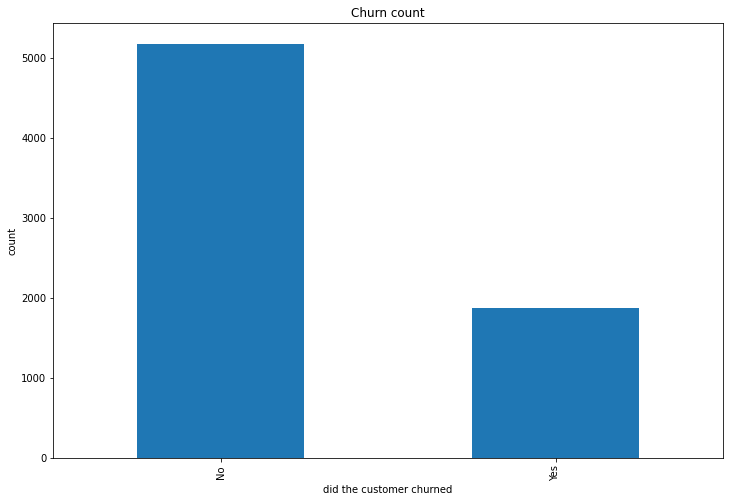

In [39]:
df["churn"].value_counts().plot(kind="bar", figsize= (12,8))
plt.xlabel("did the customer churned")
plt.ylabel("count")
plt.title("Churn count");

In [40]:
df["churn"].value_counts()*100/len(df["churn"])

No     73.463013
Yes    26.536987
Name: churn, dtype: float64

### The target is highly imbalanced 
- 73.46 % of the customers did not churn 
- 26.53 % of the customers did churn

---

# DataSet cleaning

---

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


In [42]:
df["totalcharges"] =  pd.to_numeric(df["totalcharges"], errors= "coerce")

In [43]:
# after conveting the object into float we havet ot check if there are any missing values

df.isnull().sum()

customerid           0
gender               0
seniorcitizen        0
partner              0
dependents           0
tenure               0
phoneservice         0
multiplelines        0
internetservice      0
onlinesecurity       0
onlinebackup         0
deviceprotection     0
techsupport          0
streamingtv          0
streamingmovies      0
contract             0
paperlessbilling     0
paymentmethod        0
monthlycharges       0
totalcharges        11
churn                0
dtype: int64

In [44]:
df[df["totalcharges"].isnull() == True]

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


### after checking the missing values there are two options

1. drop them, since there are less than .2% of the whole dataset 

2. from analysing the other features of the missing values, we can conclude that the reason for the missing values, is that the customers are new to the company and have been customer for less than one month

- we could fill the that by simply multiplying copying the monthly charges


In [45]:
df["monthlycharges"][df["totalcharges"].isnull() == True]

488     52.55
753     20.25
936     80.85
1082    25.75
1340    56.05
3331    19.85
3826    25.35
4380    20.00
5218    19.70
6670    73.35
6754    61.90
Name: monthlycharges, dtype: float64

In [46]:
df["totalcharges"][df["totalcharges"].isnull() == True] = df["monthlycharges"][df["totalcharges"].isnull() == True]

In [47]:
# change values of senior citizen to match the rest of the dataset
senior_label = {1: "yes", 0: "no"}
df.seniorcitizen = df.seniorcitizen.map(senior_label)

In [48]:
# save new csv for future usage

df.to_csv("data/telco_basic_clean.csv")

---

# EDA

---

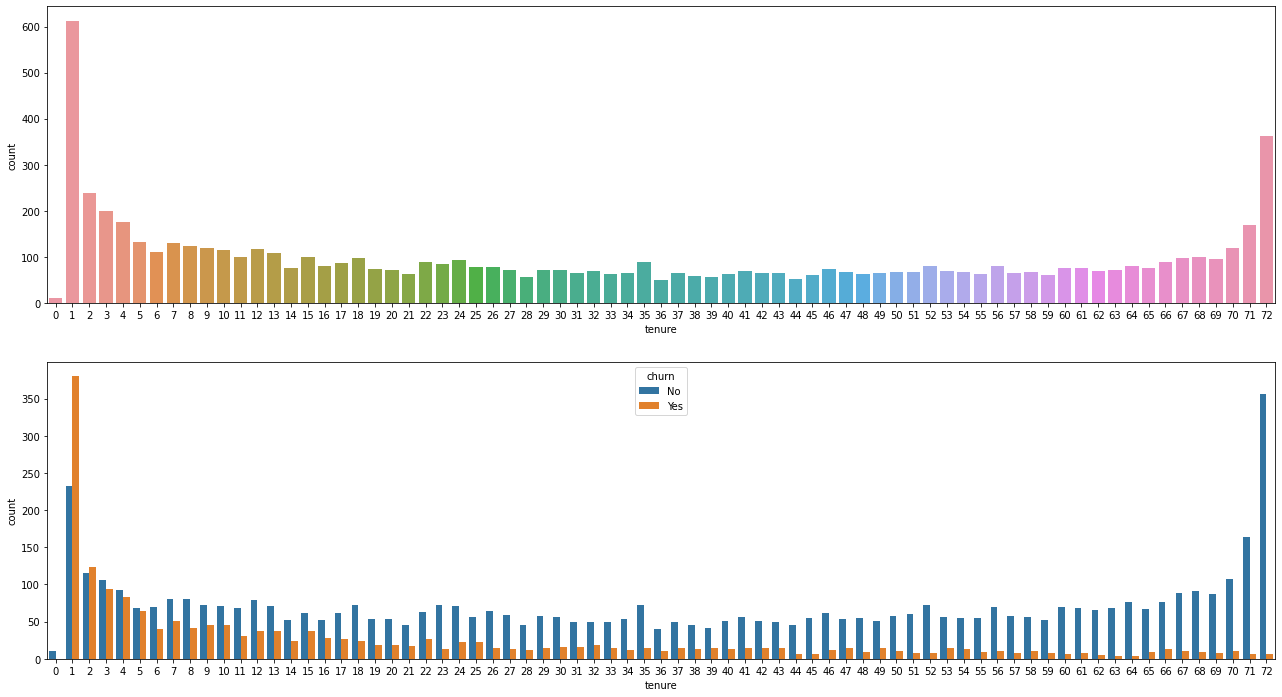

In [49]:
fig, ax = plt.subplots(2,1, figsize=(22,12))
sns.countplot(data=df, x="tenure", ax=ax[0])
sns.countplot(data=df, x="tenure", hue="churn", ax=ax[1]);

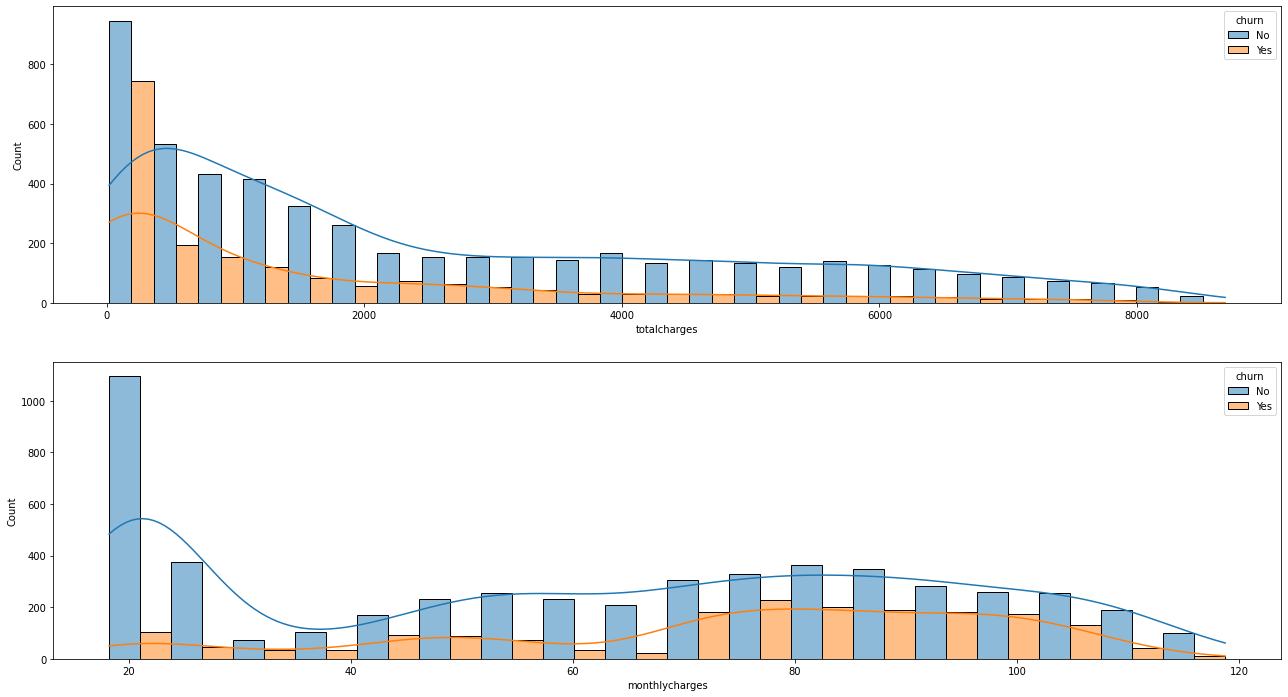

In [50]:
fig, ax = plt.subplots(2,1, figsize=(22,12))
sns.histplot(data=df, x="totalcharges", hue="churn", multiple="dodge", kde=True, ax=ax[0])
sns.histplot(data=df, x="monthlycharges", hue="churn", multiple="dodge", kde=True, ax=ax[1]);

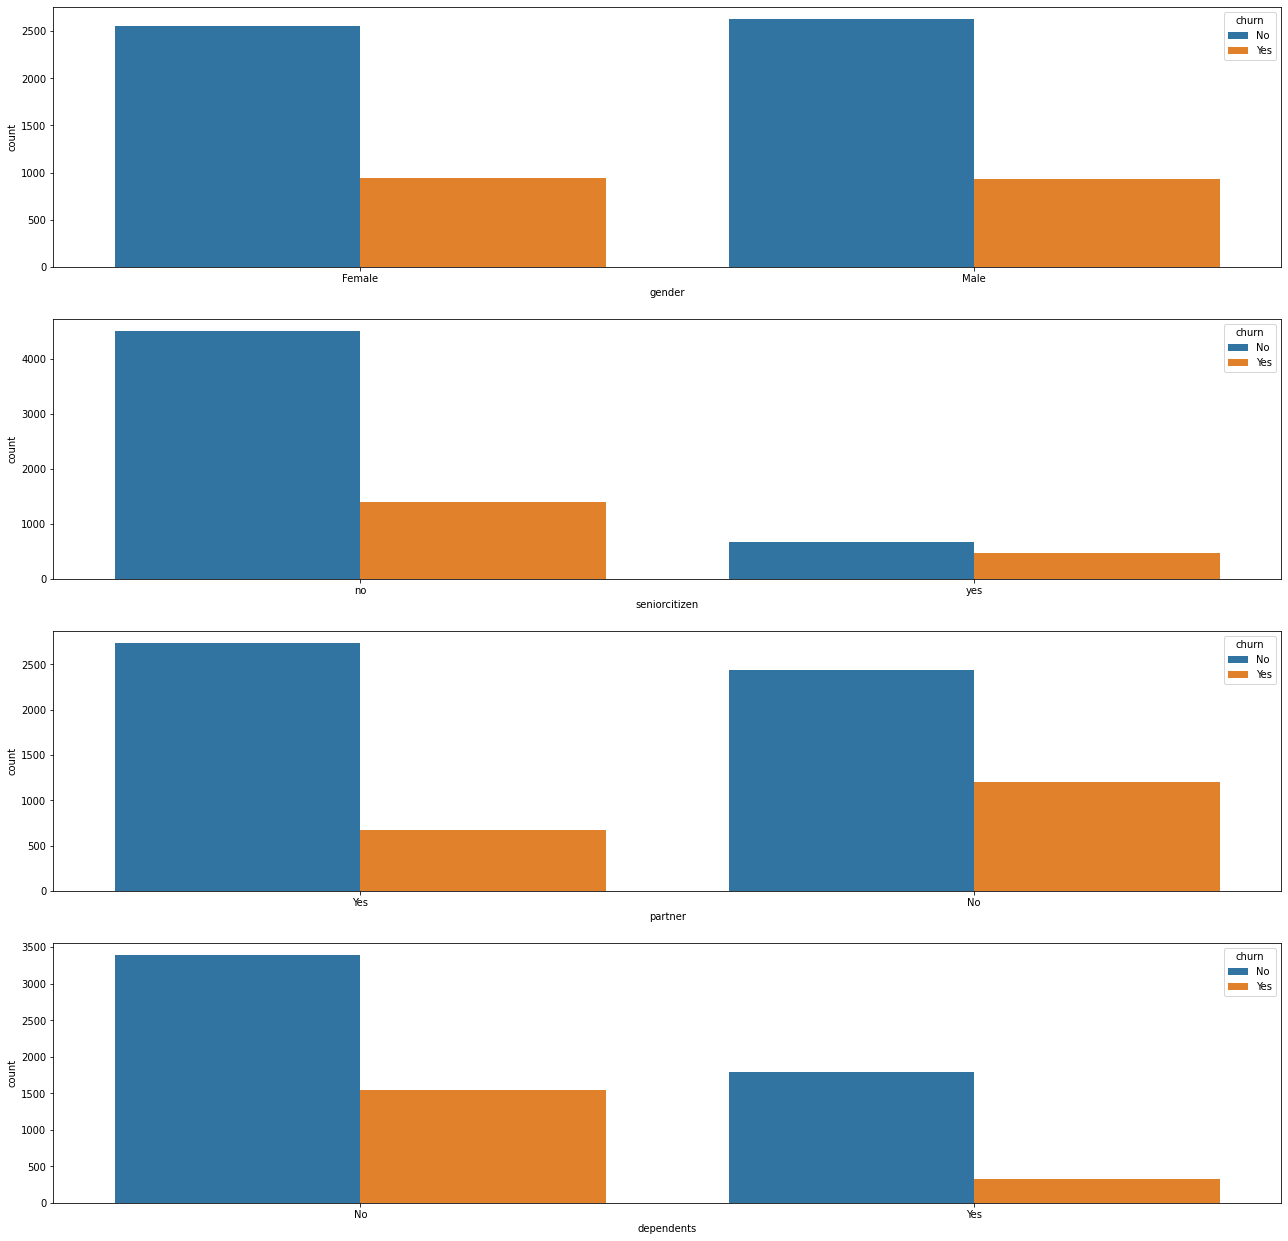

In [51]:
fig, ax = plt.subplots(4,1, figsize=(22,22))

sns.countplot(data=df, x="gender", hue="churn", ax=ax[0]);

sns.countplot(data=df, x="seniorcitizen", hue="churn", ax=ax[1])

sns.countplot(data=df, x="partner", hue="churn", ax=ax[2])

sns.countplot(data=df, x="dependents", hue="churn", ax=ax[3]);

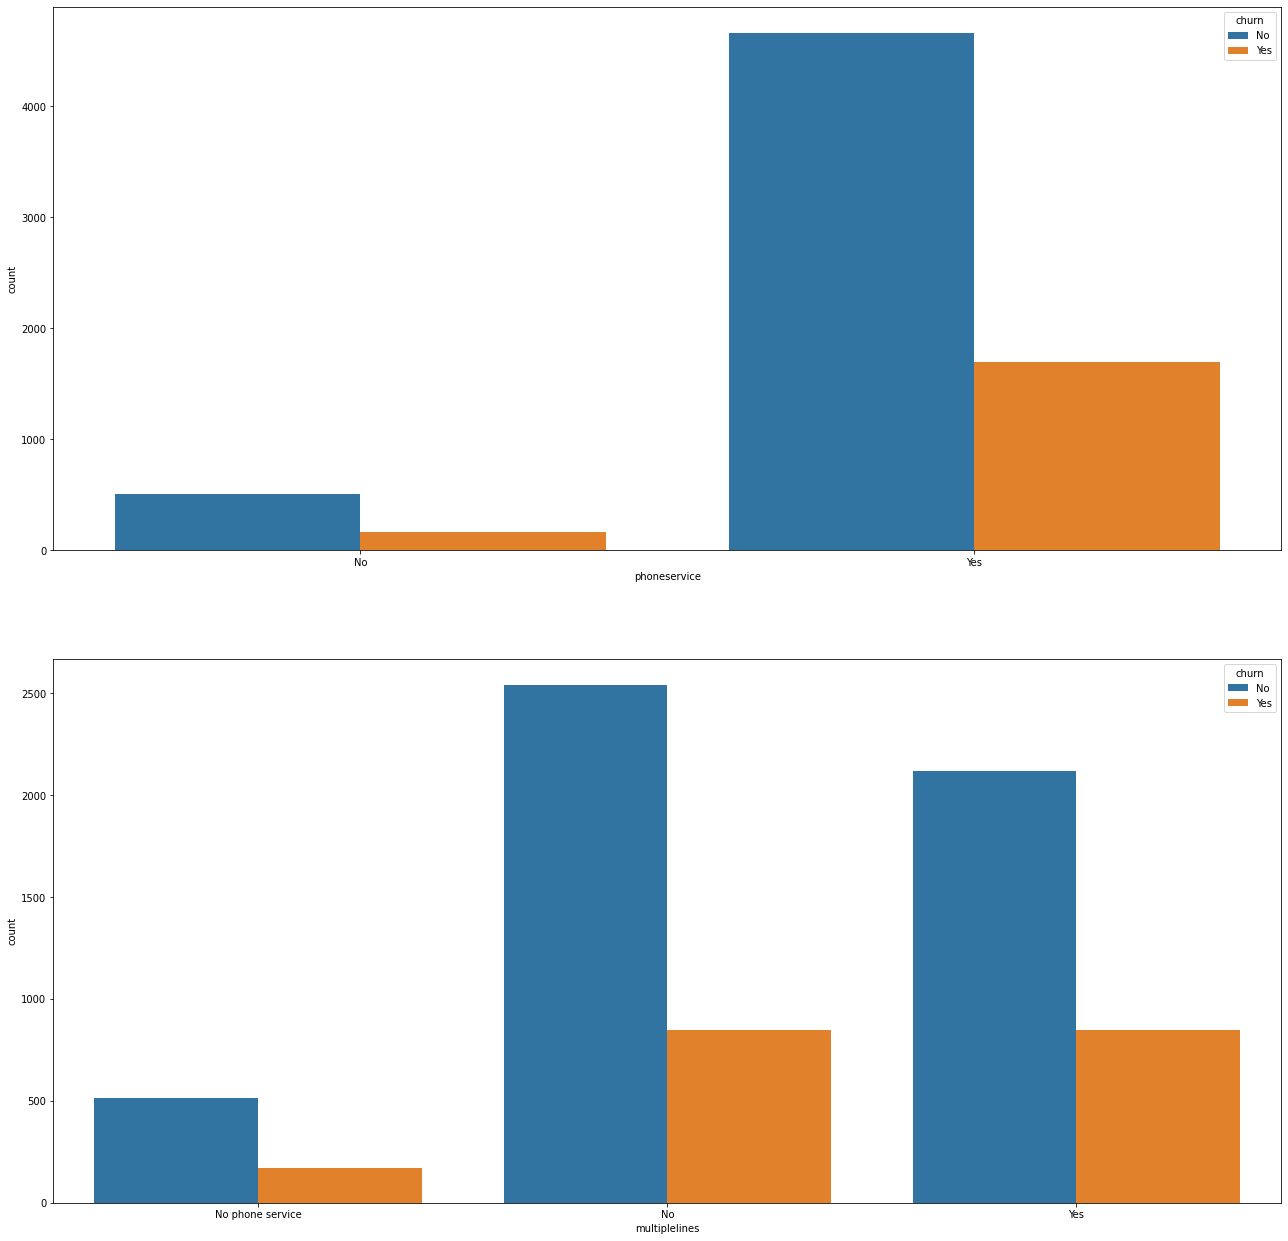

In [52]:
fig, ax = plt.subplots(2,1, figsize=(22,22))

sns.countplot(data=df, x="phoneservice", hue="churn", ax=ax[0])

sns.countplot(data=df, x="multiplelines", hue="churn", ax=ax[1]);


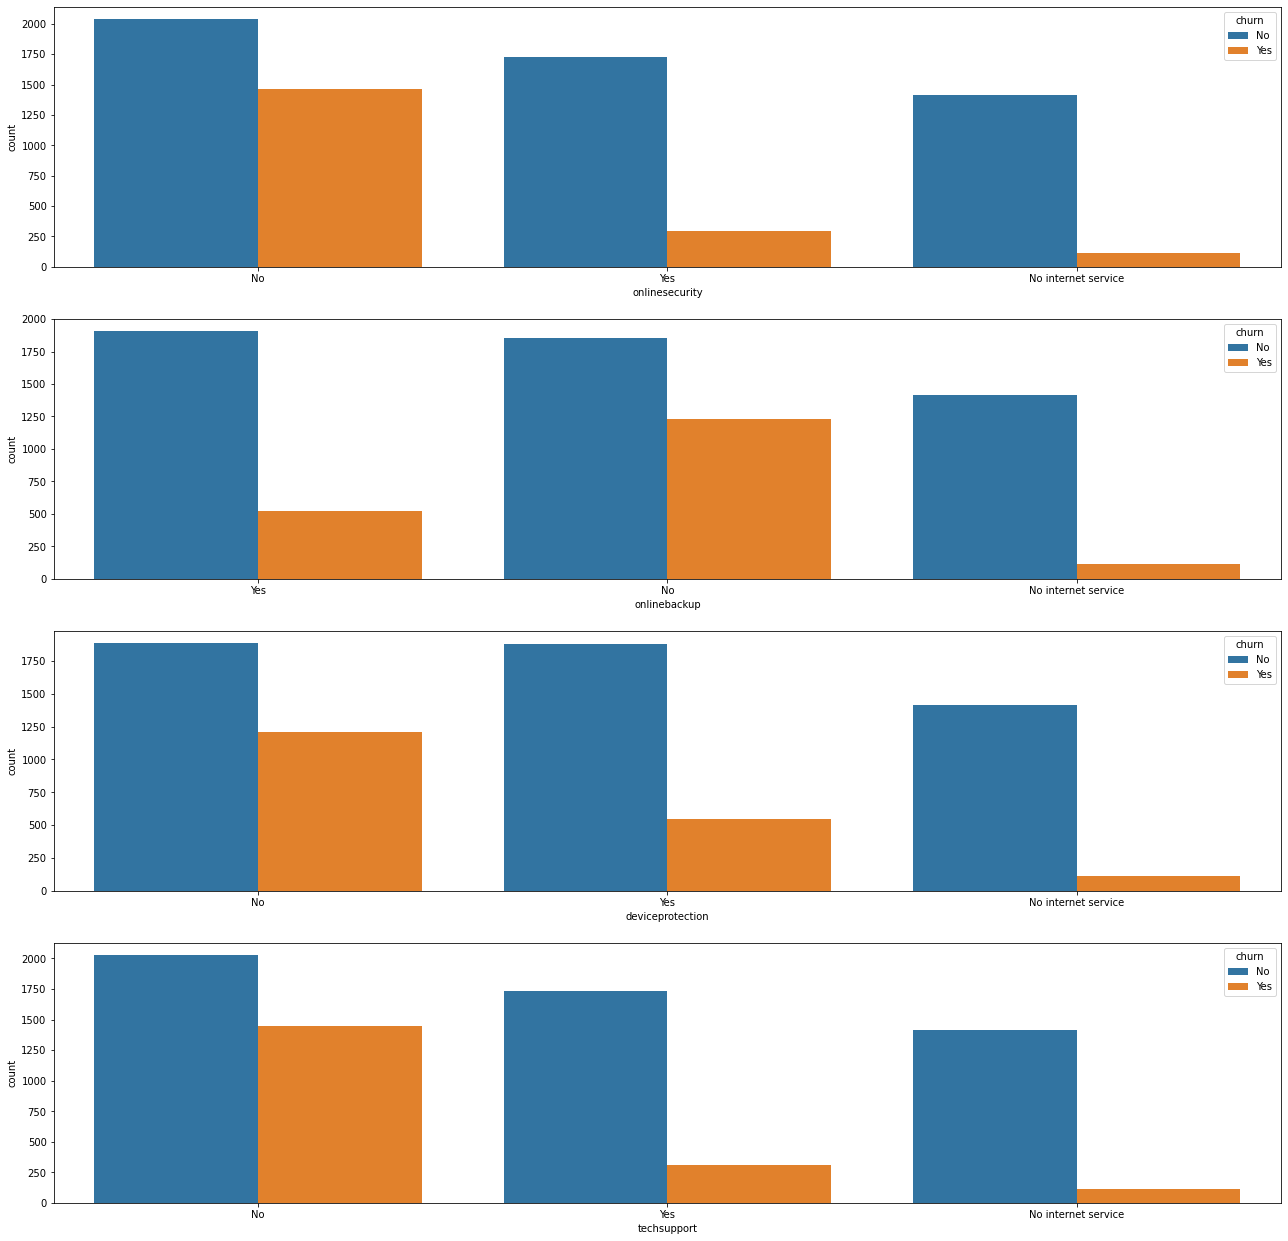

In [53]:
fig, ax = plt.subplots(4,1, figsize=(22,22))

sns.countplot(data=df, x="onlinesecurity", hue="churn", ax=ax[0]);

sns.countplot(data=df, x="onlinebackup", hue="churn", ax=ax[1])

sns.countplot(data=df, x="deviceprotection", hue="churn", ax=ax[2])

sns.countplot(data=df, x="techsupport", hue="churn", ax=ax[3]);

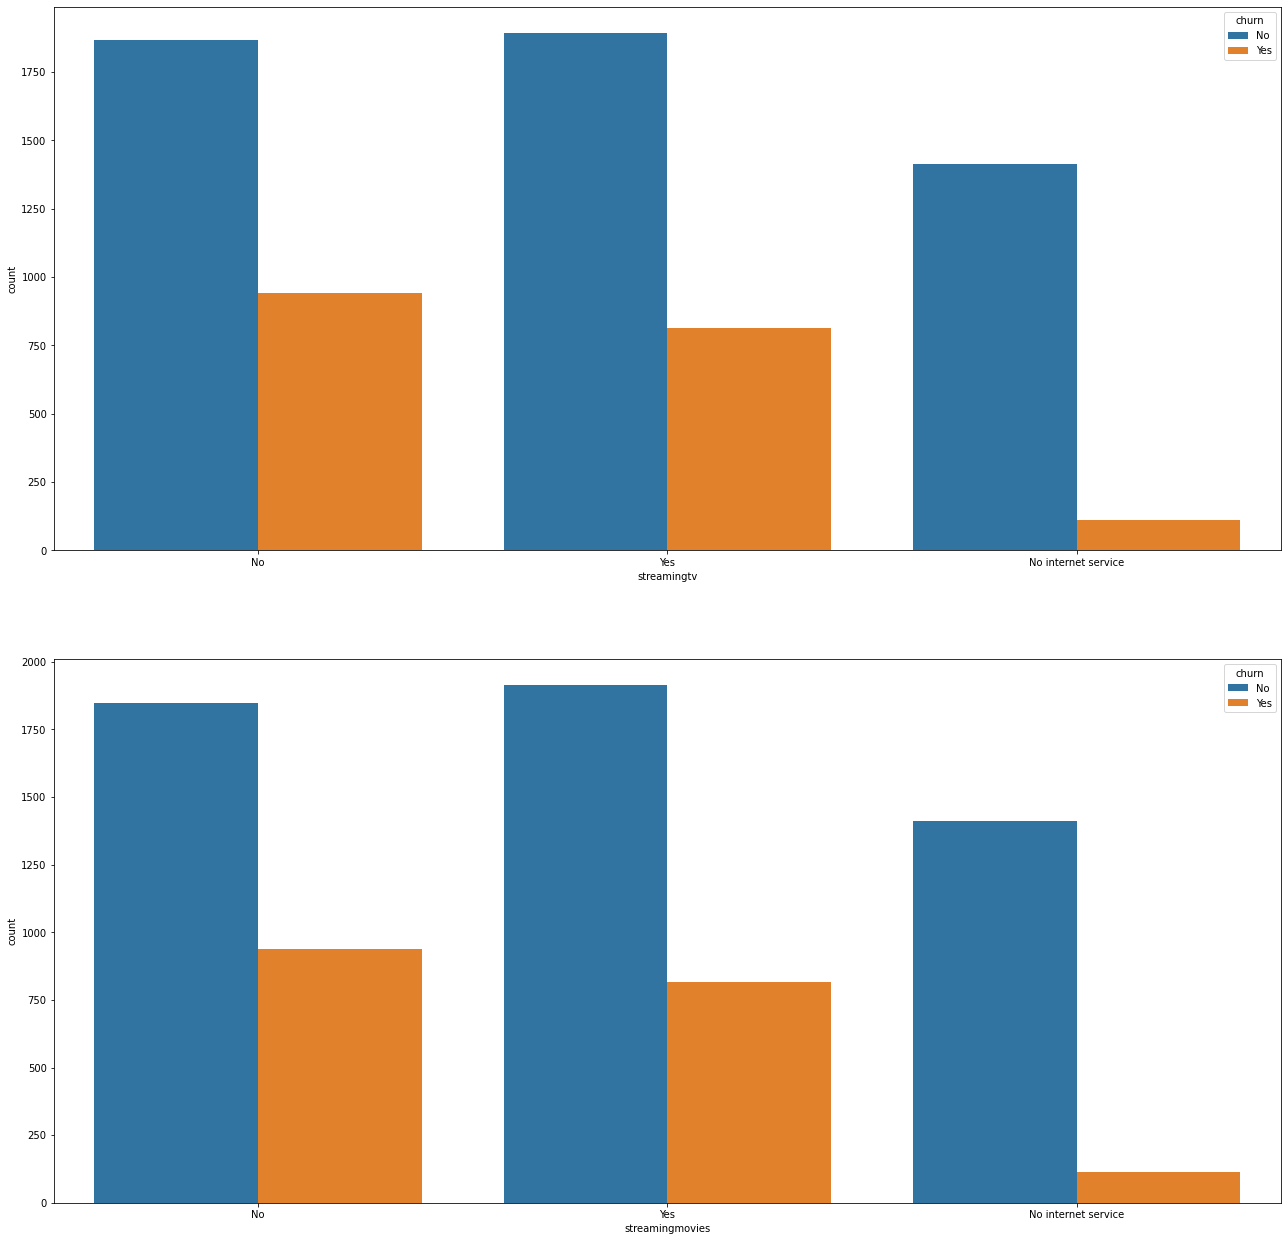

In [54]:
fig, ax = plt.subplots(2,1, figsize=(22,22))

sns.countplot(data=df, x="streamingtv", hue="churn", ax=ax[0]);

sns.countplot(data=df, x="streamingmovies", hue="churn", ax=ax[1]);

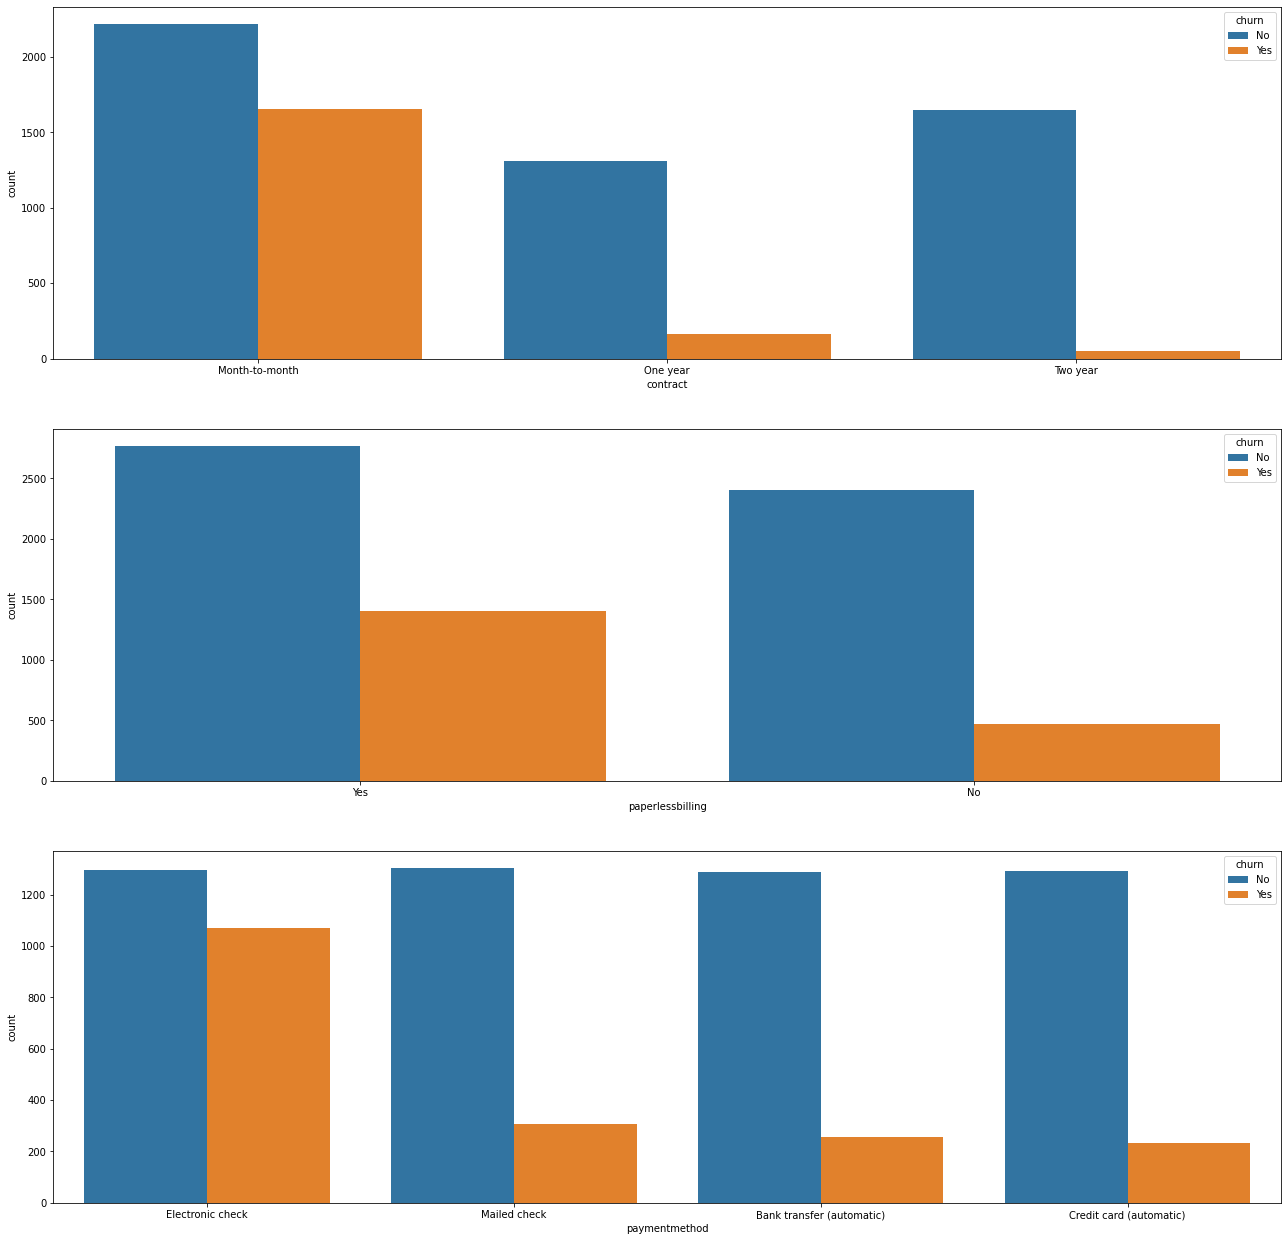

In [55]:
fig, ax = plt.subplots(3,1, figsize=(22,22))

sns.countplot(data=df, x="contract", hue="churn", ax=ax[0]);

sns.countplot(data=df, x="paperlessbilling", hue="churn", ax=ax[1])

sns.countplot(data=df, x="paymentmethod", hue="churn", ax=ax[2]);